In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_classif
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import auc, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('marketing_training.csv', sep=',', keep_default_na=False, na_values=[''])

In [4]:
#Initial dataset check
data.head(10)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no
5,47.0,blue-collar,married,basic.4y,no,yes,no,telephone,may,fri,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
6,35.0,services,single,NaN,no,yes,no,telephone,may,tue,...,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,999.0,0,yes
7,NaN,services,married,high.school,no,yes,no,telephone,may,wed,...,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,999.0,0,no
8,28.0,unemployed,married,basic.9y,no,yes,no,cellular,may,fri,...,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,999.0,0,no
9,46.0,blue-collar,married,basic.9y,no,yes,no,cellular,nov,mon,...,1,failure,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no


In [5]:
#Dataset check
data.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
count,5610.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000
mean,40.009804,2.518344,960.024548,0.184111,0.052091,93.570708,-40.561316,3.583141,5165.224251,959.797028,0.361883
std,10.574616,2.695055,192.845029,0.516775,1.568399,0.578345,4.649800,1.744865,73.108669,193.969418,1.261668
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,18.000000


In [6]:
#rows and columns in dataset
data.shape

(7414, 22)

# Data Cleaning

In [7]:
#Replace NA in categorical columns
data['custAge'].fillna(np.mean(data['custAge']), inplace=True)
data['schooling'].fillna('unknown', inplace=True)
week_day = data['day_of_week'].value_counts().index[0]
data['day_of_week'] = data['day_of_week'].fillna(week_day)

In [8]:
#check for blank values & fill in missing values
data.isnull().sum()

custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
responded         0
dtype: int64

In [9]:
#Change string to numeric
data['responded'] = data['responded'].map({'yes': 1, 'no': 0})

In [10]:
data.dtypes

custAge           float64
profession         object
marital            object
schooling          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
pmonths           float64
pastEmail           int64
responded           int64
dtype: object

In [11]:
#Unbalanced Data
data.groupby(data.responded).count()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
responded,,,,,,,,,,,,,,,,,,,,,
0,6574,6574,6574,6574,6574,6574,6574,6574,6574,6574,...,6574,6574,6574,6574,6574,6574,6574,6574,6574,6574
1,840,840,840,840,840,840,840,840,840,840,...,840,840,840,840,840,840,840,840,840,840


In [12]:
df_majority = data[data.responded==0]
df_minority = data[data.responded==1]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=6574, random_state=123)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.responded.value_counts()

1    6574
0    6574
Name: responded, dtype: int64

In [13]:
#Cleaned dataset
data=df_upsampled
data.head(10)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,40.009804,blue-collar,married,unknown,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.000000,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.000000,management,divorced,unknown,unknown,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0
4,40.009804,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,0
5,47.000000,blue-collar,married,basic.4y,no,yes,no,telephone,may,fri,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
7,40.009804,services,married,high.school,no,yes,no,telephone,may,wed,...,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,999.0,0,0
8,28.000000,unemployed,married,basic.9y,no,yes,no,cellular,may,fri,...,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,999.0,0,0
9,46.000000,blue-collar,married,basic.9y,no,yes,no,cellular,nov,mon,...,1,failure,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
10,40.009804,admin.,married,unknown,no,yes,no,cellular,aug,mon,...,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,999.0,0,0


# Data Analysis

In [14]:
data.groupby(data.responded).mean()
#Observations: Customers responded and purchased policy when they were previously contacted with fewer days in between.

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
responded,,,,,,,,,,,,
0,39.893908,2.578947,983.439154,0.144052,0.224825,93.598573,-40.628674,3.782652,5174.756221,983.350928,0.285519,0.0
1,40.836558,2.059020,778.215546,0.505628,-1.285960,93.365158,-40.137496,2.033273,5090.593809,776.877299,0.992394,1.0


In [15]:
data.groupby(data.marital).mean()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
marital,,,,,,,,,,,,
divorced,46.378393,2.290191,882.094005,0.380790,-0.410831,93.548384,-40.433243,2.997063,5134.951703,881.297888,0.755450,0.484332
married,42.788379,2.355002,890.873718,0.313441,-0.412948,93.506436,-40.215705,3.051655,5138.459265,890.296963,0.636739,0.468896
single,33.850353,2.266907,861.716727,0.326835,-0.790734,93.412651,-40.658412,2.610858,5121.121974,860.783097,0.603851,0.561252
unknown,43.223312,1.666667,999.000000,0.055556,0.705556,93.786278,-42.544444,4.295056,5201.472222,999.000000,0.166667,0.611111


In [16]:
data.groupby(data.poutcome).mean()
#Observations: Customers responded and purchased when they had a previous successful purchase

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
poutcome,,,,,,,,,,,,
failure,41.372491,1.857424,915.141919,1.314060,-1.818331,93.153505,-41.697832,1.418365,5071.904534,914.354993,2.371879,0.538765
nonexistent,39.866831,2.453876,999.000000,0.000000,-0.116830,93.543059,-40.525780,3.413172,5157.488194,999.000000,0.000000,0.432483
success,42.834357,1.850975,5.892758,1.581476,-2.101602,93.395653,-37.977019,0.901753,5021.008148,0.196425,3.336351,0.938022


# Data Preprocessing

In [17]:
#One hot encoding
for column in data.columns:
    if data[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        data[column] = le.fit_transform(data[column])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:21], data.responded, test_size=0.6, random_state=42)

# Train Models

In [19]:
#Logistic Regression Train
clf_lr=LogisticRegression()
model_lr = clf_lr.fit(X_train,y_train)

In [20]:
#Logistic Regression Test
prediction_lr=model_lr.predict(X_test)
acc_lr=float((prediction_lr==y_test).sum())/float(len(y_test))
print("Logistic Regression: {0:.2f}%".format(acc_lr))
print(classification_report(y_test, prediction_lr))
fpr_lr, tpr_lr, threshold = roc_curve(y_test, prediction_lr)
roc_auc_lr = auc(fpr_lr, fpr_lr)
#Note: not a good model because of too many features 

Logistic Regression: 0.74%
             precision    recall  f1-score   support

          0       0.72      0.79      0.75      3978
          1       0.77      0.68      0.72      3911

avg / total       0.74      0.74      0.74      7889



In [21]:
#SVM Model Train
clf_svm = SVC(C=1)
model_svm=clf_svm.fit(X_train,y_train)

In [22]:
#SVM Model Test
prediction_svm = model_svm.predict(X_test)
acc_svm=float((prediction_svm==y_test).sum())/float(len(y_test))
print("SVM accuracy: {0:.2f}%".format(acc_svm))
print(classification_report(y_test, prediction_svm))
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, prediction_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

SVM accuracy: 0.84%
             precision    recall  f1-score   support

          0       0.86      0.82      0.84      3978
          1       0.83      0.86      0.84      3911

avg / total       0.84      0.84      0.84      7889



In [25]:
#RandomForest Model Train
clf_rf = RandomForestClassifier(max_depth=55, max_features=1)
model_rf=clf_rf.fit(X_train,y_train)

In [26]:
#RandomForest Model Test

prediction_rf = model_rf.predict(X_test)
weight=model_rf.feature_importances_
varwgt=pd.DataFrame(list(zip(list(data),weight)),columns=['variable','weight'])
varwgt_sorted=varwgt.reindex(varwgt.weight.abs().sort_values(ascending=False).index)
print("Top 10 weighted variables:")
print(varwgt_sorted[0:10])

acc_rf=float((prediction_rf==y_test).sum())/float(len(y_test))
print("RandomForest Accuracy: {0:.2f}%".format(acc_rf))
print(classification_report(y_test, prediction_rf))

fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, prediction_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

Top 10 weighted variables:
          variable    weight
17       euribor3m  0.134988
0          custAge  0.124308
1       profession  0.076368
3        schooling  0.073940
10        campaign  0.068401
9      day_of_week  0.061514
14    emp.var.rate  0.060005
15  cons.price.idx  0.050378
16   cons.conf.idx  0.047894
18     nr.employed  0.045088
RandomForest Accuracy: 0.94%
             precision    recall  f1-score   support

          0       0.97      0.91      0.94      3978
          1       0.91      0.97      0.94      3911

avg / total       0.94      0.94      0.94      7889



In [27]:
#Decision Tree Train
clf_dt = DecisionTreeClassifier(max_depth=15, max_features=1)
model_dt=clf_dt.fit(X_train,y_train)

In [28]:
prediction_dt = model_dt.predict(X_test)
acc_dt=float((prediction_dt==y_test).sum())/float(len(y_test))
print("Decision Tree Accuracy: {0:.2f}%".format(acc_dt))
print(classification_report(y_test, prediction_dt))

fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, prediction_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

Decision Tree Accuracy: 0.84%
             precision    recall  f1-score   support

          0       0.86      0.82      0.84      3978
          1       0.82      0.87      0.85      3911

avg / total       0.84      0.84      0.84      7889



In [34]:
#MLP Model Train
clf_mlp = MLPClassifier(hidden_layer_sizes=(30, 15), alpha=1)
model_mlp=clf_mlp.fit(X_train,y_train)

In [35]:
#MLP Model Test
prediction_mlp = model_mlp.predict(X_test)
score_mlp = model_mlp.score(X_test, y_test)
acc_mlp=float((prediction_mlp==y_test).sum())/float(len(y_test))
print("MLP Accuracy: {0:.2f}%".format(acc_mlp))
print(classification_report(y_test, prediction_mlp))
print('Coef Shape') 
print( [coef.shape for coef in clf_mlp.coefs_])

fpr_mlp, tpr_mlp, threshold_mlp = roc_curve(y_test, prediction_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

MLP Accuracy: 0.70%
             precision    recall  f1-score   support

          0       0.67      0.81      0.73      3978
          1       0.75      0.58      0.66      3911

avg / total       0.71      0.70      0.70      7889

Coef Shape
[(21, 30), (30, 15), (15, 1)]


In [31]:
#Adaboost Model Train
clf_a = AdaBoostClassifier(DecisionTreeClassifier(max_depth=15, max_features=1))
model_a=clf_a.fit(X_train,y_train)

In [32]:
#Adaboost Model Test
prediction_a = model_a.predict(X_test)
score_a = model_a.score(X_test, y_test)
acc_a=float((prediction_a==y_test).sum())/float(len(y_test))
print("MLP Accuracy: {0:.2f}%".format(acc_a))
print(classification_report(y_test, prediction_a))

fpr_a, tpr_a, threshold_a = roc_curve(y_test, prediction_a)
roc_auc_a = auc(fpr_a, tpr_a)

MLP Accuracy: 0.94%
             precision    recall  f1-score   support

          0       0.97      0.90      0.93      3978
          1       0.90      0.97      0.94      3911

avg / total       0.94      0.94      0.94      7889



# Compare Area Under the Curve

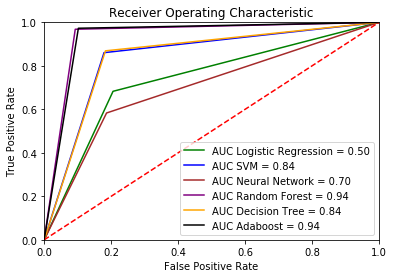

In [36]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', color='green', label = 'AUC Logistic Regression = %0.2f' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, 'b', color='blue', label = 'AUC SVM = %0.2f' % roc_auc_svm)
plt.plot(fpr_mlp, tpr_mlp, 'b',color='brown', label = 'AUC Neural Network = %0.2f' % roc_auc_mlp)
plt.plot(fpr_rf, tpr_rf, 'b', color='purple', label = 'AUC Random Forest = %0.2f' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, 'b',color='orange', label = 'AUC Decision Tree = %0.2f' % roc_auc_dt)
plt.plot(fpr_a, tpr_a, 'b',color='black', label = 'AUC Adaboost = %0.2f' % roc_auc_a)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Apply Model to marketing_test.csv

In [37]:
data_test = pd.read_csv('marketing_test.csv', sep=',', keep_default_na=False, na_values=[''])

In [38]:
#Replace NA in columns
data_test['custAge'].fillna(np.mean(data_test['custAge']), inplace=True)
data_test['schooling'].fillna('unknown', inplace=True)
week_day = data_test['day_of_week'].value_counts().index[0]
data_test['day_of_week'] = data_test['day_of_week'].fillna(week_day)

In [39]:
data_test.head(10)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,39.441368,entrepreneur,married,university.degree,no,yes,no,cellular,jul,wed,...,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,999.000000,0
1,58.000000,entrepreneur,married,university.degree,unknown,no,no,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,999.000000,0
2,48.000000,entrepreneur,married,unknown,no,no,no,cellular,jul,mon,...,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.000000,0
3,35.000000,blue-collar,married,unknown,no,yes,no,telephone,jun,tue,...,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,999.000000,0
4,39.000000,blue-collar,married,basic.6y,no,no,no,cellular,jul,mon,...,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.000000,0
5,33.000000,technician,married,university.degree,no,no,no,telephone,nov,wed,...,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,999.000000,0
6,46.000000,admin.,married,university.degree,unknown,yes,no,cellular,jul,tue,...,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.000000,0
7,34.000000,admin.,single,unknown,unknown,no,no,telephone,jul,tue,...,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.000000,0
8,27.000000,blue-collar,unknown,unknown,no,no,no,cellular,aug,fri,...,4,1,success,-2.9,92.201,-31.4,0.881,5076.2,0.133333,0
9,72.000000,retired,divorced,university.degree,no,no,no,cellular,aug,tue,...,999,0,nonexistent,-2.9,92.201,-31.4,0.884,5076.2,999.000000,0


In [40]:
#One hot encoding
for column in data_test.columns:
    if data_test[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        data_test[column] = le.fit_transform(data_test[column])

In [41]:
#check for blank values & fill in missing values
data_test.isnull().sum()

custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
dtype: int64

In [42]:
data_test.to_csv('clean_test.csv')
clean_test = pd.read_csv('clean_test.csv', sep=',', keep_default_na=False, na_values=[''], index_col=0)
output_data = pd.read_csv('clean_test.csv', sep=',', keep_default_na=False, na_values=[''], index_col=0)
clean_test.head(10)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,39.441368,2,1,5,0,2,0,0,3,4,...,999,0,1,1.4,93.918,-42.7,4.963,5228.1,999.000000,0
1,58.000000,2,1,5,1,0,0,1,4,0,...,999,0,1,1.4,94.465,-41.8,4.959,5228.1,999.000000,0
2,48.000000,2,1,6,0,0,0,0,3,1,...,999,0,1,1.4,93.918,-42.7,4.960,5228.1,999.000000,0
3,35.000000,1,1,6,0,2,0,1,4,3,...,999,0,1,1.4,94.465,-41.8,4.864,5228.1,999.000000,0
4,39.000000,1,1,1,0,0,0,0,3,1,...,999,0,1,1.4,93.918,-42.7,4.960,5228.1,999.000000,0
5,33.000000,9,1,5,0,0,0,1,7,4,...,999,0,1,-0.1,93.200,-42.0,4.120,5195.8,999.000000,0
6,46.000000,0,1,5,1,2,0,0,3,3,...,999,0,1,1.4,93.918,-42.7,4.961,5228.1,999.000000,0
7,34.000000,0,2,6,1,0,0,1,3,3,...,999,0,1,1.4,93.918,-42.7,4.961,5228.1,999.000000,0
8,27.000000,1,3,6,0,0,0,0,1,0,...,4,1,2,-2.9,92.201,-31.4,0.881,5076.2,0.133333,0
9,72.000000,5,0,5,0,0,0,0,1,3,...,999,0,1,-2.9,92.201,-31.4,0.884,5076.2,999.000000,0


In [49]:
#apply model
with open('output.csv','w') as f: 
    result = []
    for row in clean_test.values:
        pred = model_a.predict(row)
        result.append(pred)
    output_data['responded'] = result

In [50]:
output_data.to_csv('output.csv')